## Dataset: installments_payments

This file contains monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows. By comparing this file to the main application file, we see that we can first group by the SK_ID_PREV, the unique ID for the previous loan. Then we will group the resulting dataframe by the SK_ID_CURR to calculate the aggregation statistics for each client across all of their previous loans. Then we merge certain aggregation statistics for each client across all of their previous loans to the training set by unique ID of SK_ID_CURR.


Table	Row	Description
installments_payments.csv	SK_ID_PREV 	ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
installments_payments.csv	SK_ID_CURR	ID of loan in our sample
installments_payments.csv	NUM_INSTALMENT_VERSION	Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
installments_payments.csv	NUM_INSTALMENT_NUMBER	On which installment we observe payment
installments_payments.csv	DAYS_INSTALMENT	When the installment of previous credit was supposed to be paid (relative to application date of current loan)
installments_payments.csv	DAYS_ENTRY_PAYMENT	When was the installments of previous credit paid actually (relative to application date of current loan)
installments_payments.csv	AMT_INSTALMENT	What was the prescribed installment amount of previous credit on this installment
installments_payments.csv	AMT_PAYMENT	What the client actually paid on previous credit on this installment

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pandas as pd
import os
import numpy as np



## Import dataset

In [2]:
relativePath=os.getcwd()
dataFilePath=relativePath+"/installments_payments.csv"
df_installments = pd.read_csv(dataFilePath)

## EDA


************************** installments_payments ******************************

Performing basic EDA on installments_payments dataset

* The dataset has 13605401 rows and 8 columns.

* First 10 rows of the dataset:



,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470



* Describing the dataset statistics:



,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


None


* Check data distribution: 


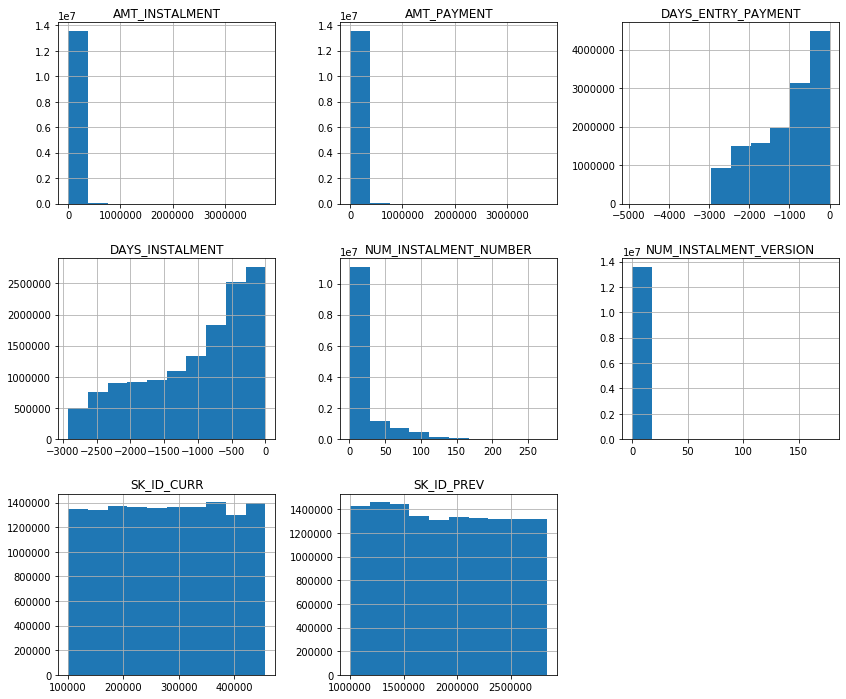

In [3]:
def basic_eda(df, datafile_name="Datafile name"):
    print(f"\n**************************",datafile_name,"******************************\n")
    print(f"Performing basic EDA on {datafile_name} dataset\n")
    print(f"* The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\n* First 10 rows of the dataset:\n")
    display(df_installments.head(10))
    print("\n* Describing the dataset statistics:\n", )
    display(df.describe())
    print("\n* Fetching info of the dataset: \n")
    display(df.info())
    print("\n* Check data distribution: ")
    df.hist(figsize=(14,12))
basic_eda(df_installments, 'installments_payments')

### SK_ID_PREV and SK_ID_CURR

In [4]:
print("* All records have distinct SK_ID_CURR? \t", len(df_installments['SK_ID_CURR'].unique()) == df_installments.shape[0])
print("* Total number of unique SK_ID_CURR   : \t", len(df_installments['SK_ID_CURR'].unique()))
print("* All records have distinct SK_ID_PREV? \t", len(df_installments['SK_ID_PREV'].unique()) == df_installments.shape[0])
print("* Total number of unique SK_ID_PREV   : \t", len(df_installments['SK_ID_PREV'].unique()))

* All records have distinct SK_ID_CURR? 	 False
* Total number of unique SK_ID_CURR   : 	 339587
* All records have distinct SK_ID_PREV? 	 False
* Total number of unique SK_ID_PREV   : 	 997752


## Feature engineering

### New features planned

- Average Payment Days per previous loans
- Average Installment Days per previous loans
- Average Payment Amount per previous loans
- Average Installment Amount per previous loans

### Group by 'SK_ID_CURR' and 'SK_ID_PREV'

In [10]:
d = {
    'SK_ID_PREV':['count'],
    'DAYS_ENTRY_PAYMENT':['mean'],
    'DAYS_INSTALMENT':['mean'],
    'AMT_PAYMENT':['mean'],
    'AMT_INSTALMENT':['mean']
    
}
df_agg = df_installments.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg(d)
# display(df_agg.head())

df_agg.columns = df_agg.columns.droplevel()
# display(df_agg.head())
df_agg.reset_index(inplace=True)
# display(df_agg.head())
df_agg.columns=['SK_ID_CURR','SK_ID_PREV','Count','Pre_Average Payment Days', 'Pre_Average Installment Days','Pre_Average Payment Amount', 'Pre_Average Installment Amount']
display(df_agg.head())

,SK_ID_CURR,SK_ID_PREV,Count,Pre_Average Payment Days,Pre_Average Installment Days,Pre_Average Payment Amount,Pre_Average Installment Amount
0,100001,1369693,4,-1679.500000,-1664.0,7312.725000,7312.725000
1,100001,1851984,3,-2882.333333,-2886.0,3981.675000,3981.675000
2,100002,1038818,19,-315.421053,-295.0,11559.247105,11559.247105
3,100003,1810518,7,-630.428571,-626.0,164425.332857,164425.332857
4,100003,2396755,12,-2151.750000,-2145.0,6731.115000,6731.115000


### Group by SK_ID_CURR

In [15]:
d2 = {
    'SK_ID_PREV':['count'],
    'Pre_Average Payment Days':['sum'],
    'Pre_Average Installment Days':['sum'],
    'Pre_Average Payment Amount':['sum'],
    'Pre_Average Installment Amount':['sum']
}
df_out = df_agg.groupby('SK_ID_CURR').agg(d2)

# display(df_out.head())

df_out.columns = df_out.columns.droplevel()

df_out.reset_index(inplace=True)

df_out.columns=['SK_ID_CURR','Count','Pre_Average Payment Days', 'Pre_Average Installment Days','Pre_Average Payment Amount', 'Pre_Average Installment Amount']
display(df_agg.head())

,SK_ID_CURR,SK_ID_PREV,Count,Pre_Average Payment Days,Pre_Average Installment Days,Pre_Average Payment Amount,Pre_Average Installment Amount
0,100001,1369693,4,-1679.500000,-1664.0,7312.725000,7312.725000
1,100001,1851984,3,-2882.333333,-2886.0,3981.675000,3981.675000
2,100002,1038818,19,-315.421053,-295.0,11559.247105,11559.247105
3,100003,1810518,7,-630.428571,-626.0,164425.332857,164425.332857
4,100003,2396755,12,-2151.750000,-2145.0,6731.115000,6731.115000


## End of notebook

<font color='blue' size=3>===================== End of NoteBook ===========================</font>